<a href="https://colab.research.google.com/github/ankitdv98/Fake-News-Classifier/blob/main/Fake_News_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dataset from kaggle

In [1]:
from google.colab import files
!pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls

gdrive	sample_data


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [5]:
#changing the working directory
%cd /content/gdrive/MyDrive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/MyDrive/Kaggle


In [6]:
pwd

'/content/gdrive/MyDrive/Kaggle'

In [7]:
!kaggle competitions download -c fake-news

submit.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
import pandas as pd
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
!unzip -q train.csv.zip -d .
!unzip -q test.csv.zip -d .
!ls

In [104]:
df= pd.read_csv('train.csv')

In [105]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


Text Preprocessing

In [106]:
df.shape

(20800, 5)

In [12]:
# Indeendent Features
X= df.drop('label', axis= 1)

In [13]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [14]:
# Dependent feature
y= df['label']

In [107]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [108]:
# As author have many missing values so can be dropped so that imp news from those missing author rows are not dropped.
# So dropping Author, and id as well

df.drop(['author'], axis=1, inplace= True)
df.drop(['id'], axis= 1, inplace= True)

In [109]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [110]:
# droppping missing values
df= df.dropna()

In [111]:
df.shape

(20203, 3)

In [112]:
messages= df.copy()

In [114]:
messages.reset_index(inplace= True)

In [115]:
messages['title'][6]

'Life: Life Of Luxury: Elton John’s 6 Favorite Shark Pictures To Stare At During Long, Transcontinental Flights'

In [116]:
messages['text'][6]

'Ever wonder how Britain’s most iconic pop pianist gets through a long flight? Here are the six pictures of sharks Sir Elton John likes to stare at to pass the time on an airplane. 1. A Shark Swimming \nSit next to Elton John on a flight and you’ll see a man living in the lap of luxury, as he immediately tapes this photo of a shark darting through the ocean over his window to stare at throughout the trip. The platinum-selling artist has been known to pull his window shade down to make the shark disappear, and then quickly retract it to mark the animal’s triumphant return. He will often repeat this act dozens of times per flight. 2. A Great White Shark Leaping Into The Air \nWhen you’re an international pop sensation worth an estimated $450 million, people go the extra mile to make you happy. Flight crews are instructed to place this photo of a breaching great white in Elton John’s seat-back pocket before he even boards the plane. The five-time Grammy winner loves to pull the image out 

In [117]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re


In [26]:
# First working on news title to see how effetive title is for the prediction
# If not helpful then will go for text columns but text column will require large vocab size
# Preprocessing Text:
    # Remove Punctuations, Special Characters, digits etc
    # Represent text in lower case
    # Removing stop words
    # Applying Stemming

ps= PorterStemmer()
corpus= []
for i in range(len(messages)):
  review= re.sub('[^a-zA-Z]', ' ', messages['title'][i])
  review= review.lower()
  review= review.split()
  review= [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  corpus.append(" ".join(review))

In [27]:
corpus[3]

'civilian kill singl us airstrik identifi'

#CountVectorizer

In [34]:
# making CountVectorizer model
# converting vocabulary to vectors

from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features= 5000, ngram_range= (1,3), max_df= 0.75)
X= cv.fit_transform(corpus).toarray()

In [35]:
X.shape

(20203, 5000)

In [36]:
y= messages['label']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 0)

In [38]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid']

In [39]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.75,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [40]:
count_df= pd.DataFrame(X_train, columns= cv.get_feature_names())

In [41]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,absurd,abus,abus new,abus new york,academi,accept,access,access pipelin,access pipelin protest,accid,accident,accord,account,accus,accus trump,achiev,acknowledg,acknowledg emf,acknowledg emf damag,aclu,acquit,acquitt,acr,across,act,act like,act new,act new york,action,activ,...,xi,xi jinp,yahoo,yale,ye,year,year ago,year breitbart,year eve,year later,year new,year new york,year old,year old girl,yemen,yemeni,yet,yet anoth,yiannopoulo,yield,york,york citi,york new,york new york,york time,yorker,young,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
import matplotlib.pyplot as plt

In [43]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [44]:
# Using Naive Bayes classifier: good with text data

from sklearn.naive_bayes import MultinomialNB
classifier= MultinomialNB()


In [45]:
from sklearn import metrics
import numpy as np
import itertools

accuracy score:  0.9063551771926351
Confusion matrix, without normalization


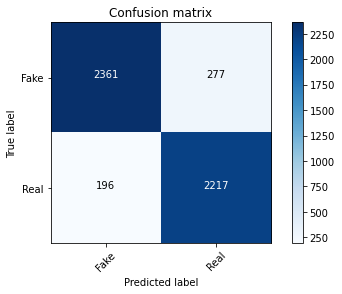

In [46]:
classifier.fit(X_train, y_train)
pred= classifier.predict(X_test)
score= metrics.accuracy_score(y_test, pred)
print("accuracy score: ", score)
cm= metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes= ['Fake', 'Real'])

In [47]:
y.value_counts(normalize= True)

0    0.514132
1    0.485868
Name: label, dtype: float64

In [48]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      2638
           1       0.89      0.92      0.90      2413

    accuracy                           0.91      5051
   macro avg       0.91      0.91      0.91      5051
weighted avg       0.91      0.91      0.91      5051



In [49]:
#Tunning alpha of MultinomialNB
previous_score= 0
for alpha in np.arange(0, 1, 0.1):
  sub_classifier= MultinomialNB(alpha= alpha)
  sub_classifier.fit(X_train, y_train)
  y_pred= sub_classifier.predict(X_test)
  score= metrics.accuracy_score(y_test, y_pred)
  if score> previous_score:
    classifier = sub_classifier
  print("Alpha= {}, SCore= {}".format(alpha, score))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha= 0.0, SCore= 0.9012076816471986
Alpha= 0.1, SCore= 0.907741041377945
Alpha= 0.2, SCore= 0.9079390219758464
Alpha= 0.30000000000000004, SCore= 0.9067511383884379
Alpha= 0.4, SCore= 0.9061571965947337
Alpha= 0.5, SCore= 0.9067511383884379
Alpha= 0.6000000000000001, SCore= 0.9061571965947337
Alpha= 0.7000000000000001, SCore= 0.9061571965947337
Alpha= 0.8, SCore= 0.9067511383884379
Alpha= 0.9, SCore= 0.9071470995842408


In [50]:
classifier.get_params()

{'alpha': 0.9, 'class_prior': None, 'fit_prior': True}

Test Data Preprocessing and Transforming into vectors

In [ ]:
test= pd.read_csv('test.csv')
submit= pd.read_csv('submit.csv')

In [ ]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
submit.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


In [ ]:
test.drop(['author'], axis= 1, inplace= True)
test.drop(['id'], axis= 1, inplace= True)

In [ ]:
test.head()

,title,text
0,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning..."
1,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,#NoDAPL: Native American Leaders Vow to Stay A...,Videos #NoDAPL: Native American Leaders Vow to...
3,"Tim Tebow Will Attempt Another Comeback, This ...","If at first you don’t succeed, try a different..."
4,Keiser Report: Meme Wars (E995),42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
test_messages= test.copy()

In [ ]:
test_messages= test_messages.fillna('missing')
test_messages.isnull().sum()

title    0
text     0
dtype: int64

In [ ]:
ps= PorterStemmer()
test_corpus= []
for i in range(len(test_messages)):
  review= re.sub('[^a-zA-Z]', ' ', test_messages['title'][i])
  review= review.lower()
  review= review.split()
  review= [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  test_corpus.append(" ".join(review))

In [ ]:
test_corpus[0]

'specter trump loosen tongu purs string silicon valley new york time'

In [ ]:
test_vector= cv.transform(test_corpus).toarray()

In [ ]:
test_df= pd.DataFrame(test_vector, columns= cv.get_feature_names())

In [ ]:
final_predictions= classifier.predict(test_df)

In [ ]:
final_predictions[0:5]

array([0, 1, 1, 0, 1])

In [ ]:
submit['label']= final_predictions
submit.head()

,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1


In [ ]:
submit.to_csv('final_submit.csv', index= None)

#**TF-IDF**

In [58]:
len(messages['text'][2])


7692

In [ ]:
ps= PorterStemmer()
corpus= []
for i in range(len(messages)):
  review= re.sub('[^a-zA-Z]', " ", messages['title'][i])
  review= review.lower()
  review= review.split()
  review= [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review= " ".join(review)
  corpus.append(review)


In [59]:
corpus[3]

'civilian kill singl us airstrik identifi'

In [72]:
#TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features= 5000, ngram_range= (1, 3), max_df= 0.75)
X= tfidf.fit_transform(corpus).toarray()

In [73]:
X.shape

(20203, 5000)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 0)


In [75]:
tfidf.get_feature_names()[:20]  

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid']

In [76]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.75,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [77]:
count_df= pd.DataFrame(X_train, columns= tfidf.get_feature_names())

In [79]:
count_df.tail()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,absurd,abus,abus new,abus new york,academi,accept,access,access pipelin,access pipelin protest,accid,accident,accord,account,accus,accus trump,achiev,acknowledg,acknowledg emf,acknowledg emf damag,aclu,acquit,acquitt,acr,across,act,act like,act new,act new york,action,activ,...,xi,xi jinp,yahoo,yale,ye,year,year ago,year breitbart,year eve,year later,year new,year new york,year old,year old girl,yemen,yemeni,yet,yet anoth,yiannopoulo,yield,york,york citi,york new,york new york,york time,yorker,young,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
14137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123052,0.0,0.0,0.0,0.123314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
from sklearn.naive_bayes import MultinomialNB
classifier= MultinomialNB(alpha= 0.9, fit_prior= True)

accuracy score:  0.8876423032502887
Confusion matrix, without normalization


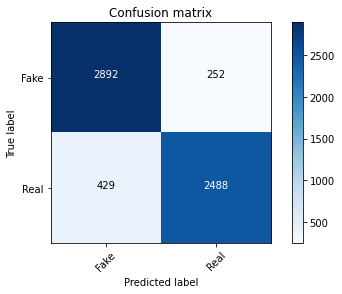

In [83]:
classifier.fit(X_train, y_train)
pred= classifier.predict(X_test)
score= metrics.accuracy_score(y_test, pred)
print("accuracy score: ", score)
cm= metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes= ['Fake', 'Real'])

In [84]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      3144
           1       0.91      0.85      0.88      2917

    accuracy                           0.89      6061
   macro avg       0.89      0.89      0.89      6061
weighted avg       0.89      0.89      0.89      6061



#**Word Embedding with LSTM**

In [ ]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [85]:
print(df.shape)
df.isnull().sum()


(20203, 3)


title    0
text     0
label    0
dtype: int64

In [95]:
messages= df.copy()

In [87]:
import tensorflow as tf

In [88]:
tf.__version__

'2.4.0'

In [131]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [90]:
voc_size= 5000
input_dim= 300

In [92]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('popular')

In [98]:
messages.head()

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


In [100]:
len(messages)

20203

In [118]:
#Data Preprocessing
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
corpus= []
for i in range(0, len(messages)):
  review= re.sub('[^a-zA-Z]', ' ', messages['title'][i])
  review= review.lower()
  review= review.split()
  review= [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review= " ".join(review)
  corpus.append(review)

In [119]:
corpus[0:5]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri']

In [120]:
onehot_repr= [one_hot(word, voc_size) for word in corpus]

In [121]:
onehot_repr[0:5]

[[3543, 4485, 3301, 4961, 2112, 1134, 472, 463, 4513, 2366],
 [2027, 3064, 1716, 2992, 3071, 604, 3668],
 [4480, 1683, 1342, 2783],
 [3698, 275, 2988, 2481, 673, 2206],
 [2124, 3071, 4320, 3945, 2522, 2313, 3071, 2718, 4986, 3450]]

In [122]:
#Embedding representation
sent_length= 15
embed_doc= pad_sequences(onehot_repr, padding= 'pre', maxlen= sent_length)
print(embed_doc)

[[   0    0    0 ...  463 4513 2366]
 [   0    0    0 ... 3071  604 3668]
 [   0    0    0 ... 1683 1342 2783]
 ...
 [   0    0    0 ... 1434 4237 4460]
 [   0    0    0 ... 3744 2173 3345]
 [   0    0    0 ... 1163 3593 4198]]


In [123]:
len(embed_doc)

20203

In [124]:
embed_doc[0]

array([   0,    0,    0,    0,    0, 3543, 4485, 3301, 4961, 2112, 1134,
        472,  463, 4513, 2366], dtype=int32)

In [132]:
#Creating Model
input_dim= 40
model= Sequential()
model.add(Embedding(voc_size, input_dim, input_length= sent_length))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1, activation= 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= 'accuracy')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 15, 40)            200000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 256,503
Trainable params: 256,503
Non-trainable params: 0
________________________________________________

In [133]:
import numpy as np
X_final= np.array(embed_doc)
y_final= np.array(y)

In [134]:
X_final.shape, y_final.shape

((20203, 15), (20203,))

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_final, y_final, test_size= 0.25, random_state= 42)


In [136]:
#Model Training
model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs= 10, batch_size= 64)


Epoch 1/10
237/237 [==============================] - 8s 24ms/step - loss: 0.5952 - accuracy: 0.6358 - val_loss: 0.3689 - val_accuracy: 0.9178
Epoch 2/10
237/237 [==============================] - 5s 22ms/step - loss: 0.4594 - accuracy: 0.7957 - val_loss: 0.3340 - val_accuracy: 0.9262
Epoch 3/10
237/237 [==============================] - 5s 21ms/step - loss: 0.4368 - accuracy: 0.7981 - val_loss: 0.3024 - val_accuracy: 0.9258
Epoch 4/10
237/237 [==============================] - 5s 21ms/step - loss: 0.4154 - accuracy: 0.8117 - val_loss: 0.2856 - val_accuracy: 0.9271
Epoch 5/10
237/237 [==============================] - 5s 21ms/step - loss: 0.4090 - accuracy: 0.8118 - val_loss: 0.2727 - val_accuracy: 0.9301
Epoch 6/10
237/237 [==============================] - 5s 21ms/step - loss: 0.3990 - accuracy: 0.8144 - val_loss: 0.2665 - val_accuracy: 0.9295
Epoch 7/10
237/237 [==============================] - 5s 21ms/step - loss: 0.3997 - accuracy: 0.8146 - val_loss: 0.2676 - val_accuracy: 0.9271

In [153]:
#Performance Matrics and Accuracy
y_pred= model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


accuracy score:  0.9273411205701841
Confusion matrix, without normalization


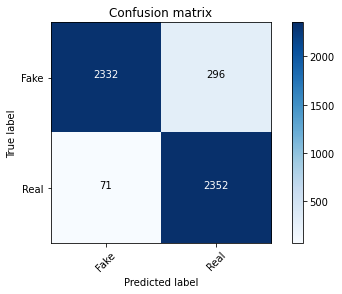

In [164]:
#Evaluating
from sklearn.metrics import confusion_matrix, accuracy_score
score= metrics.accuracy_score(y_test, y_pred)
print("accuracy score: ", score)
cm= metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes= ['Fake', 'Real'])

In [165]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      2628
           1       0.89      0.97      0.93      2423

    accuracy                           0.93      5051
   macro avg       0.93      0.93      0.93      5051
weighted avg       0.93      0.93      0.93      5051

